In [1]:
!wget "https://github.com/pradeep-016/ML_Course/raw/refs/heads/main/5)%20Association%20Rule%20Mining/FP-Growth%20Algorithm%20for%20Fast%20Association%20Rule%20Learning/online_retail_II.xlsx"

--2024-12-08 16:09:17--  https://github.com/pradeep-016/ML_Course/raw/refs/heads/main/5)%20Association%20Rule%20Mining/FP-Growth%20Algorithm%20for%20Fast%20Association%20Rule%20Learning/online_retail_II.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pradeep-016/ML_Course/refs/heads/main/5)%20Association%20Rule%20Mining/FP-Growth%20Algorithm%20for%20Fast%20Association%20Rule%20Learning/online_retail_II.xlsx [following]
--2024-12-08 16:09:17--  https://raw.githubusercontent.com/pradeep-016/ML_Course/refs/heads/main/5)%20Association%20Rule%20Mining/FP-Growth%20Algorithm%20for%20Fast%20Association%20Rule%20Learning/online_retail_II.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
!pip install mlxtend openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 18.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
data = pd.read_excel("/content/online_retail_II.xlsx")

In [5]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
data['Customer ID'] = data['Customer ID'].fillna('Unknown')
data['Description'] = data['Description'].fillna('No Description')
data['Description'] = data['Description'].str.strip()

In [7]:
cleaned_data = data[data['Quantity'] > 0]

In [8]:
cleaned_data = cleaned_data.dropna()

In [9]:
basket = cleaned_data.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.apply(lambda x: np.where(x > 0, 1, 0))

In [10]:
frequent_itemsets_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)

In [11]:
num_itemsets = len(frequent_itemsets_fp)

In [13]:
rules_fp = association_rules(frequent_itemsets_fp, num_itemsets= num_itemsets, metric="confidence", min_threshold=0.5)

In [14]:
print("Association Rules from FP-Growth:")
print(rules_fp)

Association Rules from FP-Growth:
                            antecedents                          consequents  ...  certainty  kulczynski
0           (PINK DOUGHNUT TRINKET POT)     (STRAWBERRY CERAMIC TRINKET BOX)  ...   0.646920    0.431986
1            (LOVE BUILDING BLOCK WORD)           (HOME BUILDING BLOCK WORD)  ...   0.506487    0.487862
2          (CHOCOLATE HOT WATER BOTTLE)  (HOT WATER BOTTLE TEA AND SYMPATHY)  ...   0.492852    0.493810
3    (PINK BLUE FELT CRAFT TRINKET BOX)  (PINK CREAM FELT CRAFT TRINKET BOX)  ...   0.596399    0.551653
4                (FELTCRAFT DOLL EMILY)               (FELTCRAFT DOLL ROSIE)  ...   0.556115    0.513627
..                                  ...                                  ...  ...        ...         ...
145         (POPPY'S PLAYHOUSE BEDROOM)       (POPPY'S PLAYHOUSE LIVINGROOM)  ...   0.700870    0.781320
146      (POPPY'S PLAYHOUSE LIVINGROOM)          (POPPY'S PLAYHOUSE BEDROOM)  ...   0.856168    0.781320
147            (HAND 

In [15]:
def plot_scatter_fp(rules_fp):
    plt.figure(figsize=(10, 6))
    plt.scatter(rules_fp['support'], rules_fp['confidence'], c=rules_fp['lift'], cmap='viridis', edgecolor='k')
    plt.colorbar(label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence (FP-Growth)')
    plt.show()

In [19]:
def plot_network_fp(rules_fp):
    graph = nx.DiGraph()

    for _, rule in rules_fp.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                graph.add_edge(antecedent, consequent, weight=rule['lift'])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, k=0.5)
    nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
    nx.draw_networkx_labels(graph, pos, font_size=4, font_color='black')
    plt.title('Network Graph of Association Rules (FP-Growth)')
    plt.show()

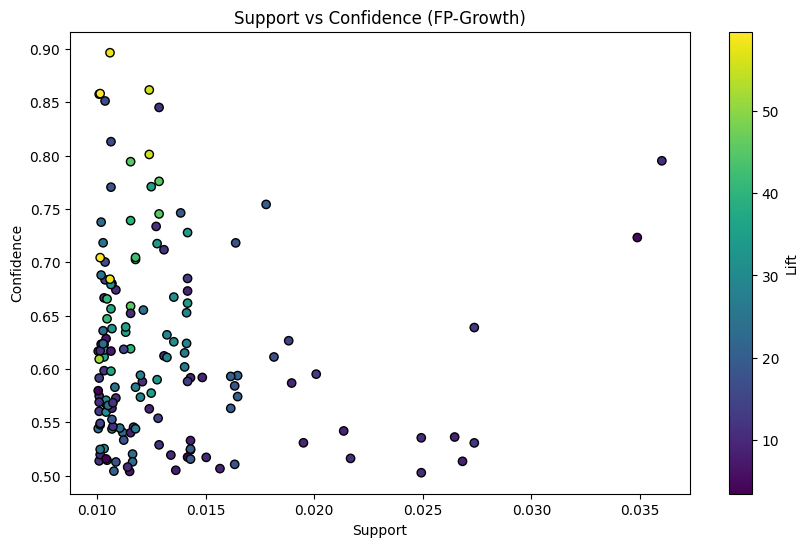

In [17]:
plot_scatter_fp(rules_fp)

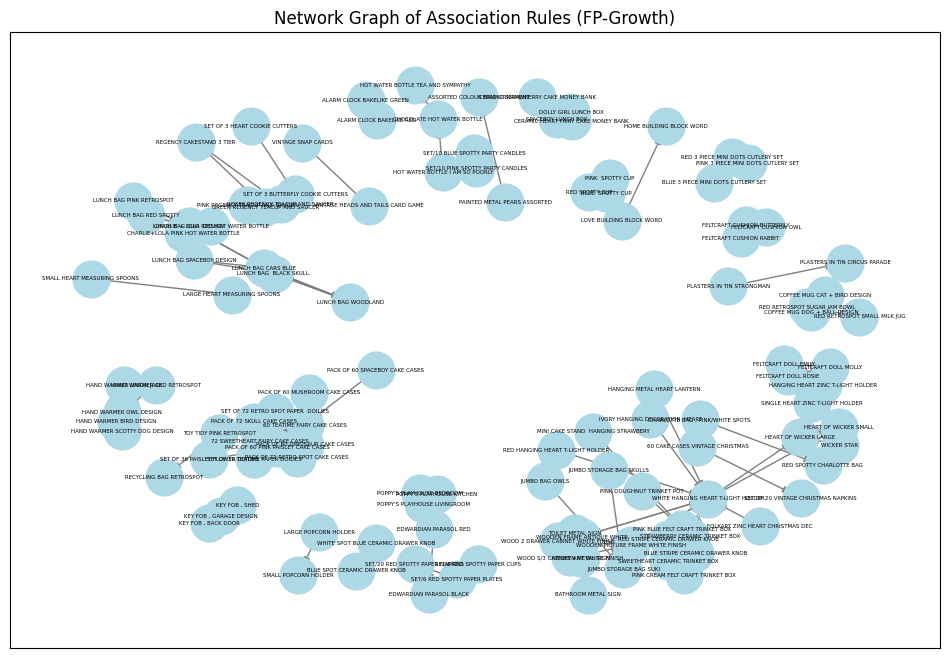

In [20]:
plot_network_fp(rules_fp)